## Connect to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import

In [ ]:
import os
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

import matplotlib.pyplot as plt

In [ ]:
print(tf. __version__)

2.15.0


## 參數設定

In [ ]:
# 藥物名稱
LABELS = ['牡丹皮','川芎','薄荷','白术']
# 對應顏色
COLORS = ['blue', 'green', 'red' ,'black']

# 訓練和驗證集比例
VAL_SPLIT = 0.15
# 每份資料取點數目
NUM_SAMPLE_POINTS = 4096
# NUM_SAMPLE_POINTS = len(point_clouds[0])

BATCH_SIZE = 16
EPOCHS = 200
INITIAL_LR = 5e-5
# 所有參數都可自行調整

## Generate custom npy for "point_clouds", "point_clouds_labels", "all_labels"

In [ ]:
import pandas as pd
import numpy as np
import os

directory = '/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/'
groups = ['牡丹皮','川芎','薄荷','白术']
num_files = 1

point_clouds = []
point_cloud_labels = []
all_labels = []

for file_index in range(1, num_files+1):
    temp_point_clouds_array = []
    temp_point_clouds_labels_array = []
    temp_all_labels_array = []

    for group in groups:
        file_path = os.path.join(directory, f'{group}/{group}_noi-{file_index}.csv')
        print(file_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df.rename(columns={"Wavelength": "Time"})
            if(group != '白术'):
            # 沿著時間取每10點
              df = df.iloc[::10,:]
            else:
            # 沿著wavelength取每10點
              df = df.iloc[:,::5]
            # print(df)
            df = df.melt(id_vars=["Time"], var_name="Wavelength", value_name="Height")

            df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
            df = df.dropna(subset=["Height"])
# 將小於0.1的，沒有代表性的資料捨去
            df_filtered = df[df["Height"] >= 0.1]
            # print(df_filtered)

            # print(df_filtered)
            # print(df_filtered)
# random sample

# Perform random sampling on the "Wavelength" column
            #random_times紀錄random_sample選取的indices
            filtered_array = df_filtered.to_numpy()
            # print(len(filtered_array))
            # if(len(filtered_array)>NUM_SAMPLE_POINTS):
            #   idx = np.random.choice(np.arange(filtered_array.shape[0]),int(len(filtered_array)/3))
            #   result_array = filtered_array[idx]
            #   print(len(result_array))
            # else:
            result_array = filtered_array
              # print(len(result_array))

            cloud_label_element = np.zeros(len(groups)+1)
            cloud_label_element[groups.index(group)] = 1

            temp_point_clouds_array.append(result_array)
            temp_point_clouds_labels_array.extend([cloud_label_element] * result_array.shape[0])
            temp_all_labels_array.extend([group] * result_array.shape[0])

    temp_point_clouds_array = np.vstack(temp_point_clouds_array)
    temp_point_clouds_labels_array = np.array(temp_point_clouds_labels_array)
    temp_all_labels_array = np.array(temp_all_labels_array)
    point_clouds.append(temp_point_clouds_array.astype(float))
    point_cloud_labels.append(temp_point_clouds_labels_array.astype(float))
    all_labels.append(temp_all_labels_array.astype("U10"))
    print(f"finish {file_index}")

print("Files saved successfully.")

/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-1.csv


<ipython-input-10-22d915fe3efb>:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-10-22d915fe3efb>:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-1.csv
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-1.csv


<ipython-input-10-22d915fe3efb>:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/白术/白术_noi-1.csv
finish 1
Files saved successfully.


<ipython-input-10-22d915fe3efb>:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# for k in range (200):
for k in range (1):
   point_clouds[k] = np.array(point_clouds[k])
   point_cloud_labels[k] = np.array(point_cloud_labels[k])
   all_labels[k] = np.array(all_labels[k])

print(point_clouds)
print(point_cloud_labels)
print(all_labels)

[array([[2.83333300e+00, 1.89458000e+02, 2.64182532e-01],
       [3.00000000e+00, 1.89458000e+02, 2.81608046e-01],
       [3.16666700e+00, 1.89458000e+02, 1.98582823e-01],
       ...,
       [3.26666700e+00, 3.48498000e+02, 1.35513050e-01],
       [3.25000000e+00, 3.54495000e+02, 1.13490872e-01],
       [3.26666700e+00, 3.54495000e+02, 1.07257822e-01]])]
[array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])]
[array(['牡丹皮', '牡丹皮', '牡丹皮', ..., '白术', '白术', '白术'], dtype='<U10')]


## Load data

In [ ]:
point_clouds = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_4kind.npy',allow_pickle=True)
point_cloud_labels = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_cloud_labels_thres_0.1_4kind.npy',allow_pickle= True)
all_labels = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/all_labels_thres_0.1_4kind.npy', allow_pickle = True)

print(f"{'Variable':<20} {'Data Type':<10} {'Shape'}")
print(f"point_clouds      {point_clouds.dtype.name:<10} {point_clouds.shape}")
print(f"point_cloud_labels {point_cloud_labels.dtype.name:<10} {point_cloud_labels.shape}")
print(f"all_labels        {all_labels.dtype.name:<10} {all_labels.shape}")

Variable             Data Type  Shape
point_clouds      float64    (200, 4096, 3)
point_cloud_labels float64    (200, 4096, 5)
all_labels        str96      (200, 4096)


## 資料正規化

In [ ]:
for index in tqdm(range(len(point_clouds))):
    current_point_cloud = point_clouds[index]
    current_label_cloud = point_cloud_labels[index]
    current_labels = all_labels[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    print(range(num_points))
    sampled_indices = random.sample(list(range(num_points)), NUM_SAMPLE_POINTS)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Sampling corresponding one-hot encoded labels.
    sampled_label_cloud = np.array([current_label_cloud[i] for i in sampled_indices])
    # Sampling corresponding labels for visualization.
    sampled_labels = np.array([current_labels[i] for i in sampled_indices])
    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)

    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    # point_clouds[index] = np.resize(point_clouds[index],(2048,3))
    point_clouds[index] = norm_point_cloud
    point_cloud_labels[index] = sampled_label_cloud
    all_labels[index] = sampled_labels

  6%|▌         | 11/200 [00:00<00:01, 103.23it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 11%|█         | 22/200 [00:00<00:02, 67.30it/s] 

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 15%|█▌        | 30/200 [00:00<00:02, 59.86it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 18%|█▊        | 37/200 [00:00<00:02, 57.61it/s]

range(0, 4096)
range(0, 4096)


 22%|██▏       | 43/200 [00:00<00:03, 50.92it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 24%|██▍       | 49/200 [00:00<00:02, 50.86it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)


 28%|██▊       | 55/200 [00:01<00:07, 18.90it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 34%|███▎      | 67/200 [00:01<00:04, 27.84it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 40%|███▉      | 79/200 [00:02<00:03, 37.31it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 46%|████▌     | 91/200 [00:02<00:02, 43.92it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 52%|█████▏    | 103/200 [00:02<00:02, 40.30it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 60%|█████▉    | 119/200 [00:04<00:05, 14.92it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 68%|██████▊   | 136/200 [00:05<00:03, 19.08it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 77%|███████▋  | 154/200 [00:05<00:01, 30.99it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)

 86%|████████▋ | 173/200 [00:05<00:00, 48.45it/s]


range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


 97%|█████████▋| 194/200 [00:06<00:00, 67.84it/s]

range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)
range(0, 4096)


100%|██████████| 200/200 [00:06<00:00, 32.02it/s]

range(0, 4096)
range(0, 4096)


## 點雲圖形繪製

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29281 (\N{CJK UNIFIED IDEOGRAPH-7261}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20025 (\N{CJK UNIFIED IDEOGRAPH-4E39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33422 (\N{CJK UNIFIED IDEOGRAPH-828E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

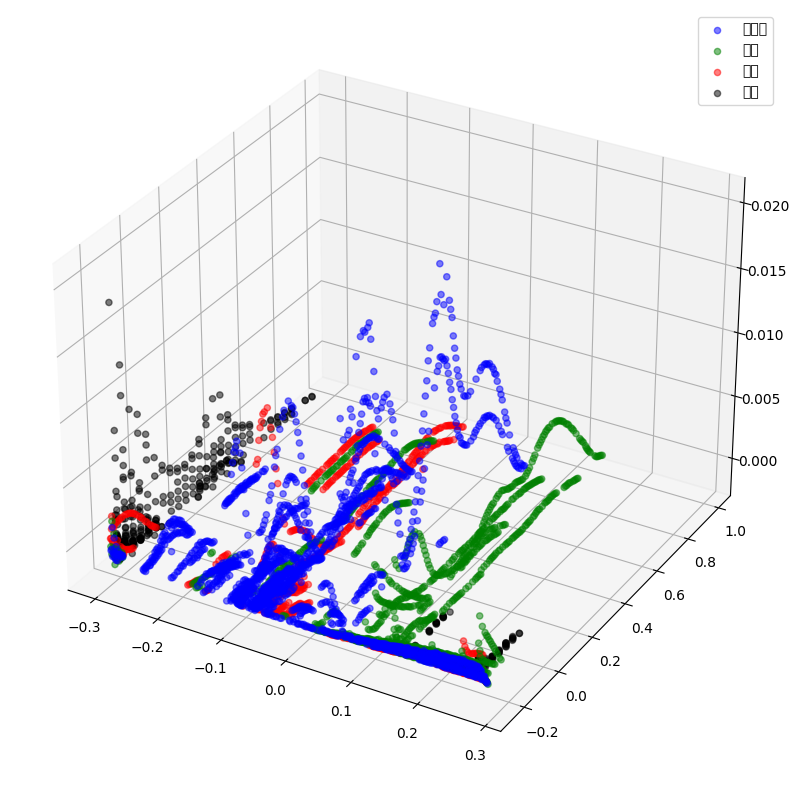

In [ ]:
def visualize_data(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()


visualize_data(point_clouds[0], all_labels[0])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33422 (\N{CJK UNIFIED IDEOGRAPH-828E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


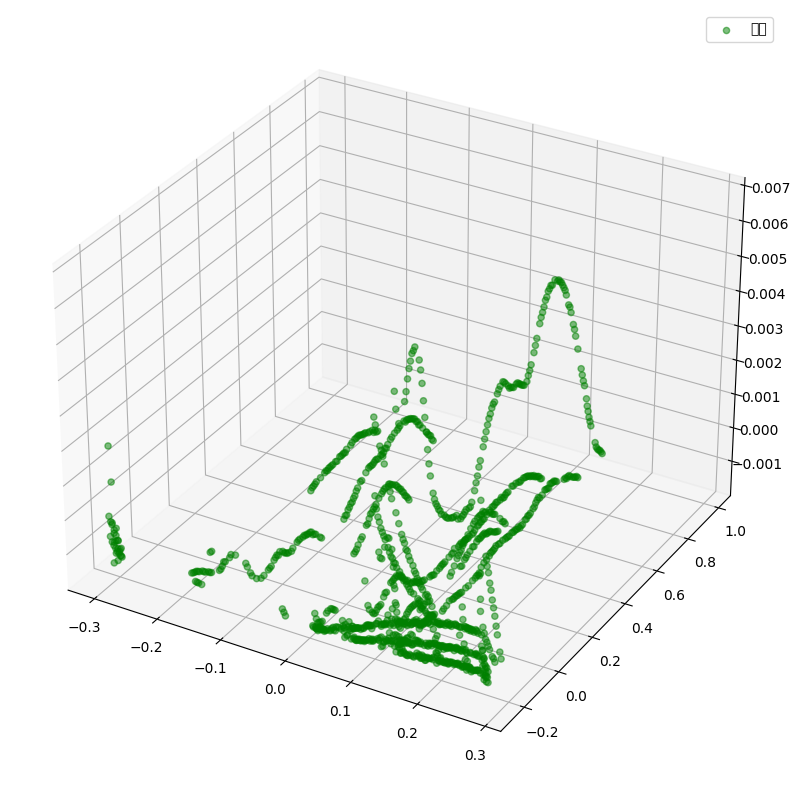

In [ ]:
def visualize_data1(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="green":
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()
visualize_data1(point_clouds[0], all_labels[0])


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34180 (\N{CJK UNIFIED IDEOGRAPH-8584}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33655 (\N{CJK UNIFIED IDEOGRAPH-8377}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


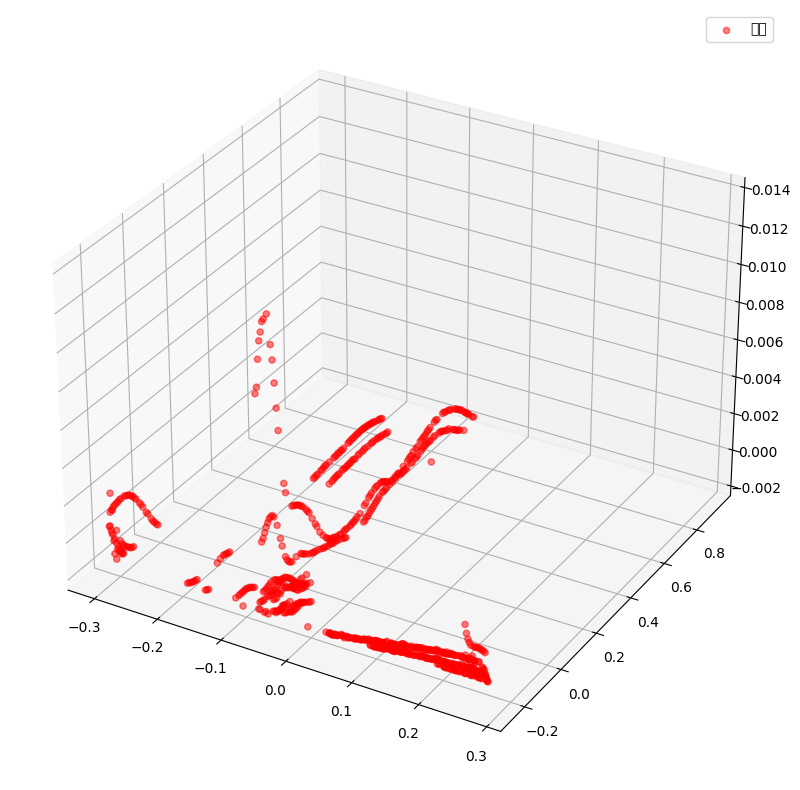

In [ ]:
def visualize_data2(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="red":
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()
visualize_data2(point_clouds[0], all_labels[0])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29281 (\N{CJK UNIFIED IDEOGRAPH-7261}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20025 (\N{CJK UNIFIED IDEOGRAPH-4E39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


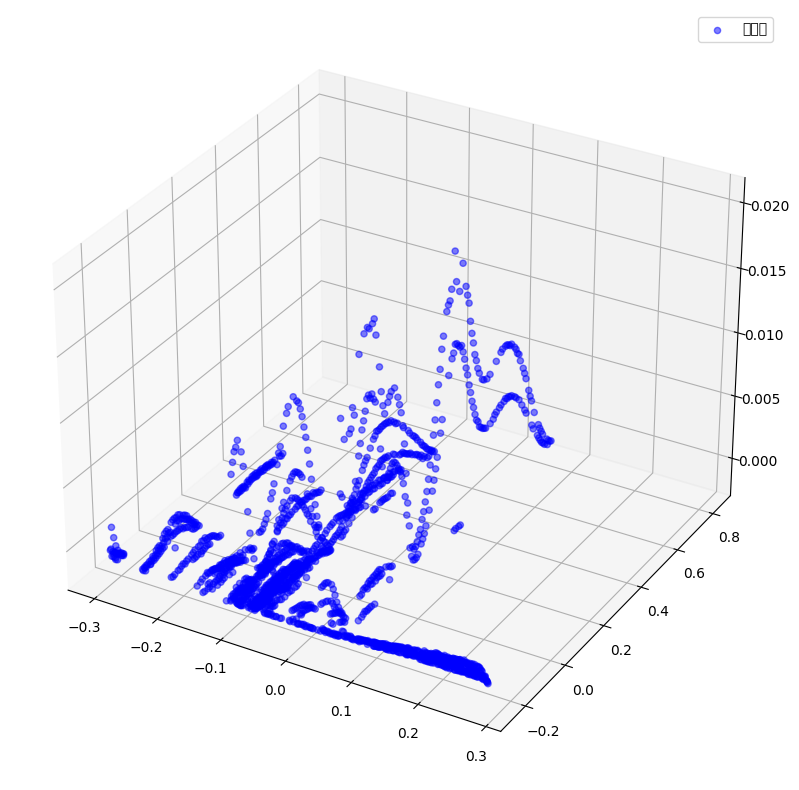

In [ ]:
def visualize_data3(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="blue":
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()

visualize_data3(point_clouds[0], all_labels[0])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26415 (\N{CJK UNIFIED IDEOGRAPH-672F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


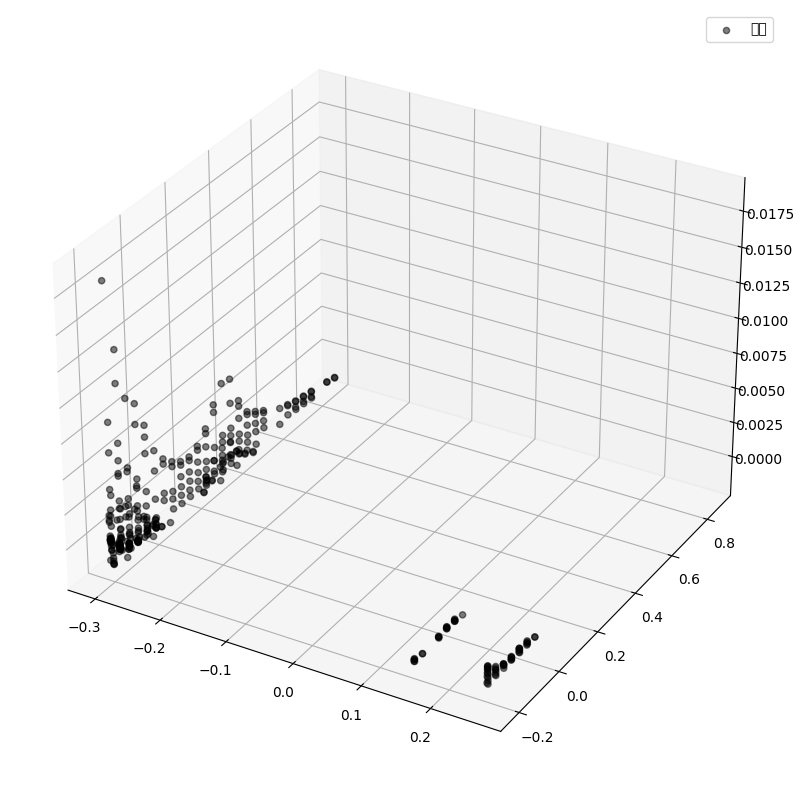

In [ ]:
def visualize_data4(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="black":
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()

visualize_data4(point_clouds[0], all_labels[0])

## 儲存

In [ ]:
np.save(os.path.join(directory, 'point_clouds_thres_0.1_4kind.npy'), point_clouds)
np.save(os.path.join(directory, 'point_cloud_labels_thres_0.1_4kind.npy'), point_cloud_labels)
np.save(os.path.join(directory, 'all_labels_thres_0.1_4kind.npy'), all_labels)

## Train cuda


In [ ]:
import cupy as cp
import tensorflow as tf

# Create the array directly as a CuPy array
cp_float_array = cp.array([
    [2.6, 189.458, 0.0141635998889819],
    [2.683333, 189.458, 1.3457694251028385],
    [2.766667, 189.458, 1.361028376630685],
    [29.56667, 361.85, 0.0110500474521696],
    [29.58333, 362.802, 0.0121339682418608],
    [39.18333, 363.797, 0.0113169617175544]
], dtype=cp.float32)

# Create a TensorFlow session and specify the GPU device
with tf.device('/gpu:0'):  # Replace '/gpu:0' with the ID of your GPU device
    # Convert the CuPy array to a TensorFlow tensor
    tensor = tf.convert_to_tensor(cp_float_array.get(), dtype=tf.float32)

print("CuPy array:")
print(cp_float_array)

print("\nTensorFlow tensor:")
print(tensor)

In [ ]:
import cupy as cp
import tensorflow as tf

def load_data(point_cloud_batch, label_cloud_batch):
    point_cloud_batch.set_shape([NUM_SAMPLE_POINTS, 3])
    label_cloud_batch.set_shape([NUM_SAMPLE_POINTS, len(LABELS) + 1])
    return point_cloud_batch, label_cloud_batch


def augment(point_cloud_batch, label_cloud_batch):
    noise = tf.random.uniform(
        tf.shape(label_cloud_batch), -0.005, 0.005, dtype=tf.float32
    )
    point_cloud_batch += noise[:, :, :3]
    return point_cloud_batch, label_cloud_batch

def generate_dataset(point_clouds, label_clouds, is_training=True):
    # Convert to TensorFlow tensors directly on the GPU
    with tf.device('/GPU:0'): # Assuming you want to use GPU:0
        point_clouds = tf.convert_to_tensor(point_clouds, dtype=tf.float32)
        label_clouds = tf.convert_to_tensor(label_clouds, dtype=tf.float32)

        dataset = tf.data.Dataset.from_tensor_slices((point_clouds, label_clouds))
        dataset = dataset.shuffle(BATCH_SIZE * 100) if is_training else dataset
        dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.batch(batch_size=BATCH_SIZE)
        dataset = (
            dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
            if is_training
            else dataset
        )
    return dataset



split_index = int(len(point_clouds) * (1 - VAL_SPLIT))
train_point_clouds = point_clouds[:split_index]
train_label_cloud = point_cloud_labels[:split_index]
total_training_examples = len(train_point_clouds)

val_point_clouds = point_clouds[split_index:]
val_label_cloud = point_cloud_labels[split_index:]

print("Num train point clouds:", len(train_point_clouds))
print("Num train point cloud labels:", len(train_label_cloud))
print("Num val point clouds:", len(val_point_clouds))
print("Num val point cloud labels:", len(val_label_cloud))

train_dataset = generate_dataset(train_point_clouds, train_label_cloud)
val_dataset = generate_dataset(val_point_clouds, val_label_cloud, is_training=False)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Decorator for GPU placement
def gpu_scope(func):
    def wrapper(*args, **kwargs):
        with tf.device('/gpu:0'):  # Replace with your GPU ID if needed
            return func(*args, **kwargs)
    return wrapper

@gpu_scope
def conv_block(x: tf.Tensor, filters: int, name: str) -> tf.Tensor:
    x = layers.Conv1D(filters, kernel_size=1, padding="valid", name=f"{name}_conv")(x)
    x = layers.BatchNormalization(momentum=0.0, name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)


@gpu_scope
def mlp_block(x: tf.Tensor, filters: int, name: str) -> tf.Tensor:
    x = layers.Dense(filters, name=f"{name}_dense")(x)
    x = layers.BatchNormalization(momentum=0.0, name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)

# Now, any call to conv_block or mlp_block will be automatically within the GPU scope.

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    """Reference: https://keras.io/examples/vision/pointnet/#build-a-model"""

    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.identity = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.identity))

    def get_config(self):
        config = super().get_config()
        config.update({"num_features": self.num_features, "l2reg_strength": self.l2reg})
        return config

In [ ]:
def transformation_net(inputs: tf.Tensor, num_features: int, name: str) -> tf.Tensor:
    """
    Reference: https://keras.io/examples/vision/pointnet/#build-a-model.

    The `filters` values come from the original paper:
    https://arxiv.org/abs/1612.00593.
    """
    x = conv_block(inputs, filters=64, name=f"{name}_1")
    x = conv_block(x, filters=128, name=f"{name}_2")
    x = conv_block(x, filters=1024, name=f"{name}_3")
    x = layers.GlobalMaxPooling1D()(x)
    x = mlp_block(x, filters=512, name=f"{name}_1_1")
    x = mlp_block(x, filters=256, name=f"{name}_2_1")
    return layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=keras.initializers.Constant(np.eye(num_features).flatten()),
        activity_regularizer=OrthogonalRegularizer(num_features),
        name=f"{name}_final",
    )(x)


def transformation_block(inputs: tf.Tensor, num_features: int, name: str) -> tf.Tensor:
    transformed_features = transformation_net(inputs, num_features, name=name)
    transformed_features = layers.Reshape((num_features, num_features))(
        transformed_features
    )
    return layers.Dot(axes=(2, 1), name=f"{name}_mm")([inputs, transformed_features])

In [ ]:
def get_shape_segmentation_model(num_points: int, num_classes: int) -> keras.Model:
    input_points = keras.Input(shape=(None, 3))

    # PointNet Classification Network.
    transformed_inputs = transformation_block(
        input_points, num_features=3, name="input_transformation_block"
    )
    features_64 = conv_block(transformed_inputs, filters=64, name="features_64")
    features_128_1 = conv_block(features_64, filters=128, name="features_128_1")
    features_128_2 = conv_block(features_128_1, filters=128, name="features_128_2")
    transformed_features = transformation_block(
        features_128_2, num_features=128, name="transformed_features"
    )
    features_512 = conv_block(transformed_features, filters=512, name="features_512")
    features_2048 = conv_block(features_512, filters=2048, name="pre_maxpool_block")
    global_features = layers.MaxPool1D(pool_size=num_points, name="global_features")(
        features_2048
    )
    global_features = tf.tile(global_features, [1, num_points, 1])

    # Segmentation head.
    segmentation_input = layers.Concatenate(name="segmentation_input")(
        [
            features_64,
            features_128_1,
            features_128_2,
            transformed_features,
            features_512,
            global_features,
        ]
    )
    segmentation_features = conv_block(
        segmentation_input, filters=128, name="segmentation_features"
    )
    outputs = layers.Conv1D(
        num_classes, kernel_size=1, activation="softmax", name="segmentation_head"
    )(segmentation_features)
    return keras.Model(input_points, outputs)

In [ ]:
x, y = next(iter(train_dataset))

num_points = x.shape[1]
num_classes = y.shape[-1]

segmentation_model = get_shape_segmentation_model(num_points, num_classes)
segmentation_model.summary()

In [ ]:
training_step_size = total_training_examples // BATCH_SIZE
total_training_steps = training_step_size * EPOCHS
print(f"Total training steps: {total_training_steps}.")

lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[training_step_size * 15, training_step_size * 15],
    values=[INITIAL_LR, INITIAL_LR * 0.5, INITIAL_LR * 0.25],
)

steps = tf.range(total_training_steps, dtype=tf.int32)
# lrs = [lr_schedule(step) for step in steps]
lrs = [INITIAL_LR for step in steps]

plt.plot(lrs)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:
def run_experiment(epochs):
    segmentation_model = get_shape_segmentation_model(num_points, num_classes)
    segmentation_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=INITIAL_LR),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

    history = segmentation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[checkpoint_callback],
    )

    segmentation_model.load_weights(checkpoint_filepath)
    return segmentation_model, history


segmentation_model, history = run_experiment(epochs=EPOCHS)

## Train cpu


In [ ]:
import numpy as np
import tensorflow as tf

# Your initial NumPy ndarray
initial_array = np.array([
    ['2.6', '189.458', 0.0141635998889819],
    ['2.683333', '189.458', 1.3457694251028385],
    ['2.766667', '189.458', 1.361028376630685],
    ['29.56667', '361.85', 0.0110500474521696],
    ['29.58333', '362.802', 0.0121339682418608],
    [39.18333, '363.797', 0.0113169617175544]
], dtype=object)

# Convert all elements to float
float_array = initial_array.astype(float)

# Convert the float_array to a TensorFlow tensor
tensor = tf.convert_to_tensor(float_array, dtype=tf.float32)

print("NumPy ndarray:")
print(float_array)

print("\nTensorFlow tensor:")
print(tensor)

NumPy ndarray:
[[2.60000000e+00 1.89458000e+02 1.41635999e-02]
 [2.68333300e+00 1.89458000e+02 1.34576943e+00]
 [2.76666700e+00 1.89458000e+02 1.36102838e+00]
 [2.95666700e+01 3.61850000e+02 1.10500475e-02]
 [2.95833300e+01 3.62802000e+02 1.21339682e-02]
 [3.91833300e+01 3.63797000e+02 1.13169617e-02]]

TensorFlow tensor:
tf.Tensor(
[[2.5999999e+00 1.8945799e+02 1.4163600e-02]
 [2.6833329e+00 1.8945799e+02 1.3457694e+00]
 [2.7666669e+00 1.8945799e+02 1.3610284e+00]
 [2.9566669e+01 3.6185001e+02 1.1050047e-02]
 [2.9583330e+01 3.6280200e+02 1.2133968e-02]
 [3.9183331e+01 3.6379700e+02 1.1316962e-02]], shape=(6, 3), dtype=float32)


In [ ]:
def load_data(point_cloud_batch, label_cloud_batch):
    point_cloud_batch.set_shape([NUM_SAMPLE_POINTS, 3])
    label_cloud_batch.set_shape([NUM_SAMPLE_POINTS, len(LABELS) + 1])

    # label_cloud_batch.set_shape([NUM_SAMPLE_POINTS, 3 + 1])
    return point_cloud_batch, label_cloud_batch


def augment(point_cloud_batch, label_cloud_batch):
    noise = tf.random.uniform(
        tf.shape(label_cloud_batch), -0.005, 0.005, dtype=tf.float64
    )
    point_cloud_batch += noise[:, :, :3]
    return point_cloud_batch, label_cloud_batch


def generate_dataset(point_clouds, label_clouds, is_training=True):
    # point_clouds = tf.convert_to_tensor(point_clouds.astype(float))
    # print(point_clouds)
    dataset = tf.data.Dataset.from_tensor_slices((point_clouds, label_clouds))
    dataset = dataset.shuffle(BATCH_SIZE * 100) if is_training else dataset
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size=BATCH_SIZE)
    dataset = (
        dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
        if is_training
        else dataset
    )
    return dataset


split_index = int(len(point_clouds) * (1 - VAL_SPLIT))
train_point_clouds = point_clouds[:split_index]
train_label_cloud = point_cloud_labels[:split_index]
total_training_examples = len(train_point_clouds)

val_point_clouds = point_clouds[split_index:]
val_label_cloud = point_cloud_labels[split_index:]

print("Num train point clouds:", len(train_point_clouds))
print("Num train point cloud labels:", len(train_label_cloud))
print("Num val point clouds:", len(val_point_clouds))
print("Num val point cloud labels:", len(val_label_cloud))

train_dataset = generate_dataset(train_point_clouds, train_label_cloud)
val_dataset = generate_dataset(val_point_clouds, val_label_cloud, is_training=False)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)

Num train point clouds: 170
Num train point cloud labels: 170
Num val point clouds: 30
Num val point cloud labels: 30
Train Dataset: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 4096, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 4096, 5), dtype=tf.float64, name=None))>
Validation Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 4096, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 4096, 5), dtype=tf.float64, name=None))>


In [ ]:
def conv_block(x: tf.Tensor, filters: int, name: str) -> tf.Tensor:
    x = layers.Conv1D(filters, kernel_size=1, padding="valid", name=f"{name}_conv")(x)
    x = layers.BatchNormalization(momentum=0.0, name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)


def mlp_block(x: tf.Tensor, filters: int, name: str) -> tf.Tensor:
    x = layers.Dense(filters, name=f"{name}_dense")(x)
    x = layers.BatchNormalization(momentum=0.0, name=f"{name}_batch_norm")(x)
    return layers.Activation("relu", name=f"{name}_relu")(x)

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    """Reference: https://keras.io/examples/vision/pointnet/#build-a-model"""

    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.identity = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.identity))

    def get_config(self):
        config = super().get_config()
        config.update({"num_features": self.num_features, "l2reg_strength": self.l2reg})
        return config


In [ ]:
def transformation_net(inputs: tf.Tensor, num_features: int, name: str) -> tf.Tensor:
    """
    Reference: https://keras.io/examples/vision/pointnet/#build-a-model.

    The `filters` values come from the original paper:
    https://arxiv.org/abs/1612.00593.
    """
    x = conv_block(inputs, filters=64, name=f"{name}_1")
    x = conv_block(x, filters=128, name=f"{name}_2")
    x = conv_block(x, filters=1024, name=f"{name}_3")
    x = layers.GlobalMaxPooling1D()(x)
    x = mlp_block(x, filters=512, name=f"{name}_1_1")
    x = mlp_block(x, filters=256, name=f"{name}_2_1")
    return layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=keras.initializers.Constant(np.eye(num_features).flatten()),
        activity_regularizer=OrthogonalRegularizer(num_features),
        name=f"{name}_final",
    )(x)


def transformation_block(inputs: tf.Tensor, num_features: int, name: str) -> tf.Tensor:
    transformed_features = transformation_net(inputs, num_features, name=name)
    transformed_features = layers.Reshape((num_features, num_features))(
        transformed_features
    )
    return layers.Dot(axes=(2, 1), name=f"{name}_mm")([inputs, transformed_features])


In [ ]:
def get_shape_segmentation_model(num_points: int, num_classes: int) -> keras.Model:
    input_points = keras.Input(shape=(None, 3))

    # PointNet Classification Network.
    transformed_inputs = transformation_block(
        input_points, num_features=3, name="input_transformation_block"
    )
    features_64 = conv_block(transformed_inputs, filters=64, name="features_64")
    features_128_1 = conv_block(features_64, filters=128, name="features_128_1")
    features_128_2 = conv_block(features_128_1, filters=128, name="features_128_2")
    transformed_features = transformation_block(
        features_128_2, num_features=128, name="transformed_features"
    )
    features_512 = conv_block(transformed_features, filters=512, name="features_512")
    features_2048 = conv_block(features_512, filters=2048, name="pre_maxpool_block")
    global_features = layers.MaxPool1D(pool_size=num_points, name="global_features")(
        features_2048
    )
    global_features = tf.tile(global_features, [1, num_points, 1])

    # Segmentation head.
    segmentation_input = layers.Concatenate(name="segmentation_input")(
        [
            features_64,
            features_128_1,
            features_128_2,
            transformed_features,
            features_512,
            global_features,
        ]
    )
    segmentation_features = conv_block(
        segmentation_input, filters=128, name="segmentation_features"
    )
    outputs = layers.Conv1D(
        num_classes, kernel_size=1, activation="softmax", name="segmentation_head"
    )(segmentation_features)
    return keras.Model(input_points, outputs)


In [ ]:
x, y = next(iter(train_dataset))

num_points = x.shape[1]
num_classes = y.shape[-1]

segmentation_model = get_shape_segmentation_model(num_points, num_classes)
segmentation_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 3)]            0         []                            
                                                                                                  
 input_transformation_block  (None, None, 64)             256       ['input_1[0][0]']             
 _1_conv (Conv1D)                                                                                 
                                                                                                  
 input_transformation_block  (None, None, 64)             256       ['input_transformation_block_1
 _1_batch_norm (BatchNormal                                         _conv[0][0]']                 
 ization)                                                                                     

Total training steps: 2000.


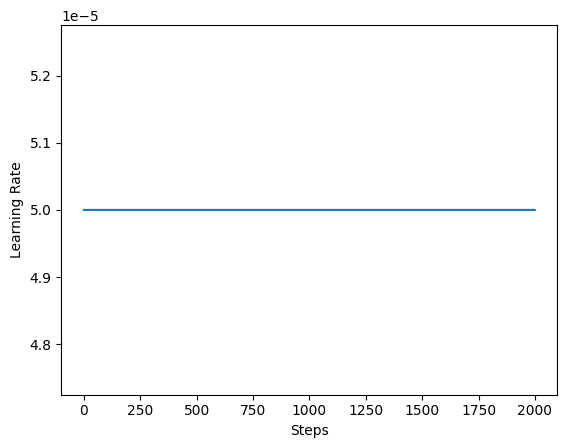

In [ ]:
training_step_size = total_training_examples // BATCH_SIZE
total_training_steps = training_step_size * EPOCHS
print(f"Total training steps: {total_training_steps}.")

lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[training_step_size * 15, training_step_size * 15],
    values=[INITIAL_LR, INITIAL_LR * 0.5, INITIAL_LR * 0.25],
)

steps = tf.range(total_training_steps, dtype=tf.int32)
# lrs = [lr_schedule(step) for step in steps]
lrs = [INITIAL_LR for step in steps]

plt.plot(lrs)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:
# EPOCHS = 2
def run_experiment(epochs):

    segmentation_model = get_shape_segmentation_model(num_points, num_classes)
    segmentation_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=INITIAL_LR),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

    history = segmentation_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[checkpoint_callback],
    )

    segmentation_model.load_weights(checkpoint_filepath)
    return segmentation_model, history


segmentation_model, history = run_experiment(epochs=EPOCHS)

Epoch 1/200
11/11 [==============================] - 51s 2s/step - loss: 5.3492 - accuracy: 0.4427 - val_loss: 6.5972 - val_accuracy: 0.2417
Epoch 2/200
11/11 [==============================] - 11s 1s/step - loss: 4.7869 - accuracy: 0.5359 - val_loss: 4.4288 - val_accuracy: 0.5401
Epoch 3/200
11/11 [==============================] - 11s 996ms/step - loss: 4.3775 - accuracy: 0.5654 - val_loss: 4.1068 - val_accuracy: 0.5570
Epoch 4/200
11/11 [==============================] - 11s 994ms/step - loss: 4.0955 - accuracy: 0.5723 - val_loss: 4.1899 - val_accuracy: 0.4775
Epoch 5/200
11/11 [==============================] - 12s 1s/step - loss: 3.8790 - accuracy: 0.5768 - val_loss: 3.7060 - val_accuracy: 0.5311
Epoch 6/200
11/11 [==============================] - 11s 990ms/step - loss: 3.6965 - accuracy: 0.5885 - val_loss: 3.4801 - val_accuracy: 0.5635
Epoch 7/200
11/11 [==============================] - 11s 1s/step - loss: 3.5446 - accuracy: 0.5937 - val_loss: 3.3930 - val_accuracy: 0.5571
Epoc

## Result visualization

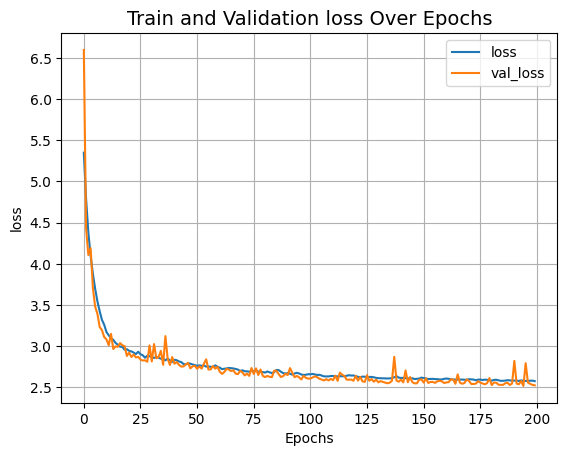

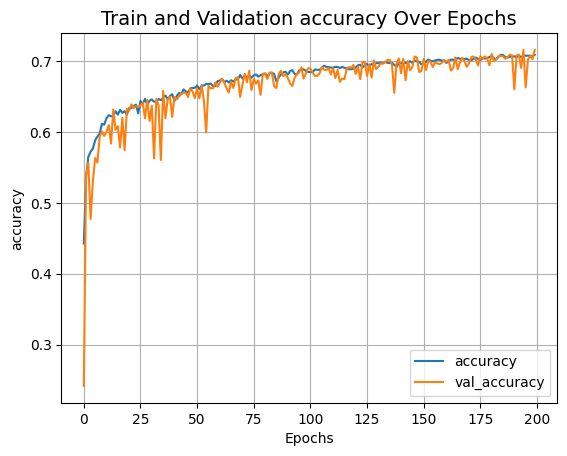

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("accuracy")

In [ ]:
validation_batch = next(iter(val_dataset))
val_predictions = segmentation_model.predict(validation_batch[0])
print(f"Validation prediction shape: {val_predictions.shape}")


def visualize_single_point_cloud(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])

def visualize_single_point_cloud1(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data1(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])

def visualize_single_point_cloud2(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data2(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])

def visualize_single_point_cloud3(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data3(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])

def visualize_single_point_cloud4(point_clouds, label_clouds, idx):
    label_map = LABELS + ["none"]
    point_cloud = point_clouds[idx]
    label_cloud = label_clouds[idx]
    visualize_data4(point_cloud, [label_map[np.argmax(label)] for label in label_cloud])


idx = np.random.choice(len(validation_batch[0]))
print(f"Index selected: {idx}")

# Plotting with ground-truth.
visualize_single_point_cloud(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud(validation_batch[0], val_predictions, idx)

# Plotting with ground-truth.
visualize_single_point_cloud1(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud1(validation_batch[0], val_predictions, idx)

# Plotting with ground-truth.
visualize_single_point_cloud2(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud2(validation_batch[0], val_predictions, idx)

# Plotting with ground-truth.
visualize_single_point_cloud3(validation_batch[0], validation_batch[1], idx)

# Plotting with predicted labels.
visualize_single_point_cloud3(validation_batch[0], val_predictions, idx)

visualize_single_point_cloud4(validation_batch[0], validation_batch[1], idx)
visualize_single_point_cloud4(validation_batch[0], val_predictions, idx)
LABELS = ['百部','川芎','薄荷','防風']
# 對應顏色
COLORS = ['blue', 'green', 'red' ,'black']


Output hidden; open in https://colab.research.google.com to view.

## 儲存各個點雲圖

In [ ]:
directory = '/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/'

point_clouds_result = []
labels_result = []
point_clouds1 = []
point_clouds2 = []
point_clouds3 = []

COLORS = ['blue', 'green', 'red' ,'black']

def save_data(point_cloud, labels):


    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        c_df = c_df.drop('label',axis = 1)
        print(c_df)
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="blue":
            point_clouds_result.append(c_df)
            labels_result.append(0)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
          if COLORS[index]=="green":
            point_clouds_result.append(c_df)
            labels_result.append(1)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
          if COLORS[index]=="red":
            point_clouds_result.append(c_df)
            labels_result.append(2)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
          if COLORS[index]=="black":
            point_clouds_result.append(c_df)
            labels_result.append(3)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )

        except IndexError:
            pass
    print(point_clouds1)
    ax.legend()
    plt.show()

def save_data1(point_cloud, labels):


    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="blue":
            point_clouds1.append(c_df)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    print(point_clouds1)
    ax.legend()
    plt.show()
def save_data2(point_cloud, labels):

    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="green":
            point_clouds2.append(c_df)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    print(point_clouds2)
    ax.legend()
    plt.show()
def save_data3(point_cloud, labels):

    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
          # 改成前面參數設定的顏色
          if COLORS[index]=="red":
            point_clouds3.append(c_df)
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    print(point_clouds3)
    ax.legend()
    plt.show()


def save_all_data(point_clouds, label_clouds):
    label_map = LABELS + ["none"]
    for idx in range(len(point_clouds)):
      point_cloud = point_clouds[idx]
      label_cloud = label_clouds[idx]
      # save_data1(point_cloud,[label_map[np.argmax(label)] for label in label_cloud])
      # save_data2(point_cloud,[label_map[np.argmax(label)] for label in label_cloud])
      # save_data3(point_cloud,[label_map[np.argmax(label)] for label in label_cloud])
      save_data(point_cloud,[label_map[np.argmax(label)] for label in label_cloud])

save_all_data(validation_batch[0], val_predictions)

# np.save(os.path.join(directory, 'point_clouds_predict1.npy'), point_clouds1)
# np.save(os.path.join(directory, 'point_clouds_predict2.npy'), point_clouds2)
# np.save(os.path.join(directory, 'point_clouds_predict3.npy'), point_clouds3)


Output hidden; open in https://colab.research.google.com to view.

## 資料正規化

In [ ]:
for k in range (64):
# for k in range (1):
   point_clouds[k] = np.array(point_clouds[k])
   point_cloud_labels[k] = np.array(point_cloud_labels[k])
   all_labels[k] = np.array(all_labels[k])

print(point_clouds)
print(point_cloud_labels)
print(all_labels)

[[[-1.50302413e-01 -2.04539758e-01 -1.41636124e-04]
  [-2.64282060e-03 -2.20187232e-01 -6.41142420e-04]
  [-1.04783253e-01 -3.20511760e-02  1.35839989e-03]
  ...
  [-1.52522835e-01  4.89264822e-01 -1.31450634e-03]
  [-1.50302413e-01  1.33209859e-01 -1.05124953e-03]
  [ 1.47237194e-01 -2.35828044e-01 -1.26128830e-03]]

 [[-1.63126311e-01  7.21607234e-01 -1.45362682e-03]
  [ 1.07613894e-01 -2.45540297e-01 -1.38011239e-03]
  [ 2.66206542e-01 -2.37560824e-01 -1.30352242e-03]
  ...
  [ 1.72183739e-01 -2.53519771e-01 -8.95085068e-04]
  [-5.66427521e-02 -5.55117472e-03 -3.23945887e-04]
  [ 2.71870472e-01 -2.45540297e-01 -1.15433827e-03]]

 [[ 1.35849722e-01 -2.51013902e-01 -5.69921332e-04]
  [ 2.51297496e-01 -2.43194529e-01 -1.02772653e-03]
  [-3.01187086e-01  1.73117125e-01 -5.57860042e-04]
  ...
  [ 2.11334775e-01 -2.35375156e-01 -1.33734678e-03]
  [-6.95143092e-02 -5.51499415e-02  1.14844751e-02]
  [ 2.47967270e-01 -2.35375156e-01 -1.45129408e-03]]

 ...

 [[-8.30852685e-02 -2.28366051e-01

In [ ]:
for index in tqdm(range(len(point_clouds_result))):
    current_point_cloud = point_clouds_result[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    print(range(num_points))
    sampled_indices = random.sample(range(num_points), 200)
    # Sampling points corresponding to sampled indices.
    # sampled_indices = np.array(sampled_indices)
    sampled_point_cloud = np.array([current_point_cloud.iloc[i] for i in sampled_indices])
    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)

    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    # point_clouds[index] = np.resize(point_clouds[index],(2048,3))
    point_clouds_result[index] = norm_point_cloud


 16%|█▌        | 10/64 [00:00<00:00, 92.24it/s]

range(0, 1655)
range(0, 701)
range(0, 1379)
range(0, 361)
range(0, 1605)
range(0, 568)
range(0, 1501)
range(0, 422)
range(0, 2797)
range(0, 683)


 55%|█████▍    | 35/64 [00:01<00:00, 35.83it/s]

range(0, 269)
range(0, 347)
range(0, 1858)
range(0, 1124)
range(0, 747)
range(0, 367)
range(0, 2626)
range(0, 654)
range(0, 445)
range(0, 371)
range(0, 1527)
range(0, 639)
range(0, 1443)
range(0, 487)
range(0, 1716)
range(0, 1047)
range(0, 937)
range(0, 396)
range(0, 2188)
range(0, 709)
range(0, 730)
range(0, 469)
range(0, 2430)
range(0, 944)
range(0, 207)


 92%|█████████▏| 59/64 [00:01<00:00, 50.52it/s]

range(0, 515)
range(0, 1425)
range(0, 966)
range(0, 1278)
range(0, 427)
range(0, 1358)
range(0, 1654)
range(0, 634)
range(0, 450)
range(0, 2022)
range(0, 560)
range(0, 1122)
range(0, 392)
range(0, 1675)
range(0, 549)
range(0, 1497)
range(0, 375)
range(0, 2097)
range(0, 566)
range(0, 972)
range(0, 461)
range(0, 1581)
range(0, 1602)
range(0, 421)
range(0, 492)
range(0, 2217)
range(0, 789)
range(0, 584)


100%|██████████| 64/64 [00:01<00:00, 42.67it/s]

range(0, 506)


# 儲存classification用(放到classification自己的資料那部分)

In [ ]:
# np.save(os.path.join(directory, 'point_clouds_predict1.npy'), point_clouds1)
# np.save(os.path.join(directory, 'point_clouds_predict2.npy'), point_clouds2)
# np.save(os.path.join(directory, 'point_clouds_predict3.npy'), point_clouds3)
np.save('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.1_for_classification_4kind_200points.npy',point_clouds_result)
np.save('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_labels_thres_0.1_for_classification_4kind_200points.npy', labels_result)
